In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
train = pd.read_csv('train.csv')

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

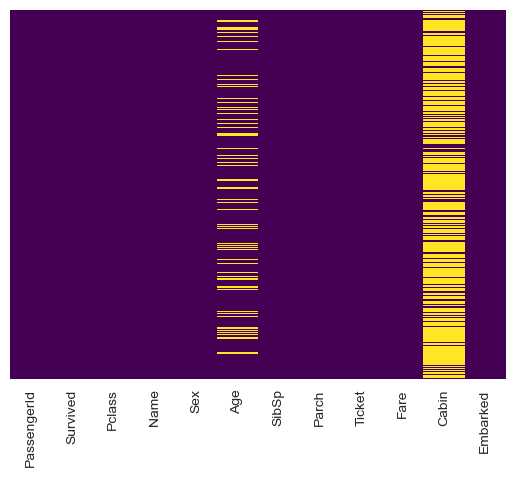

In [57]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [58]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

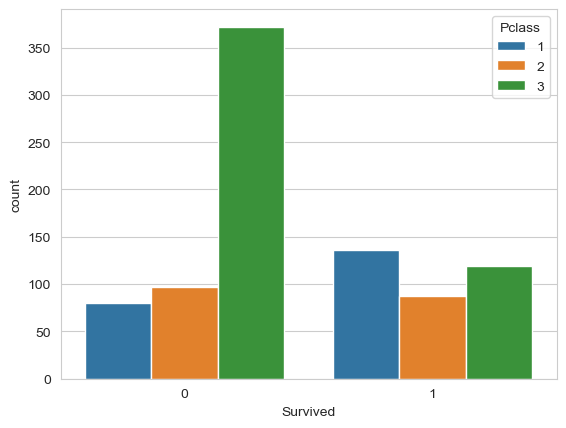

In [59]:
sns.countplot(x = 'Survived',hue = 'Pclass', data = train)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:xlabel='Age'>

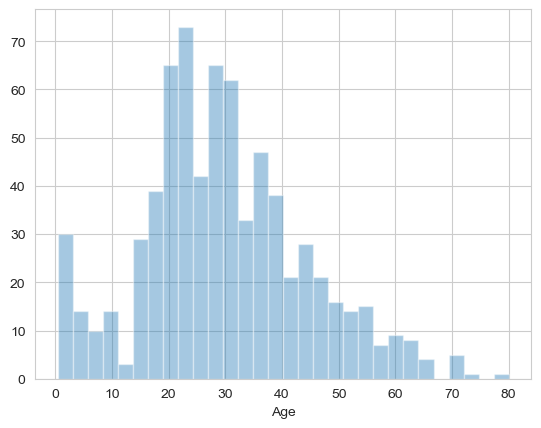

In [60]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

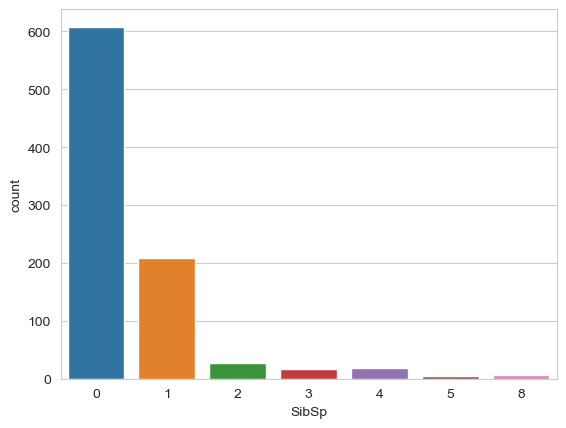

In [61]:
sns.countplot(x = 'SibSp', data = train)

<AxesSubplot:>

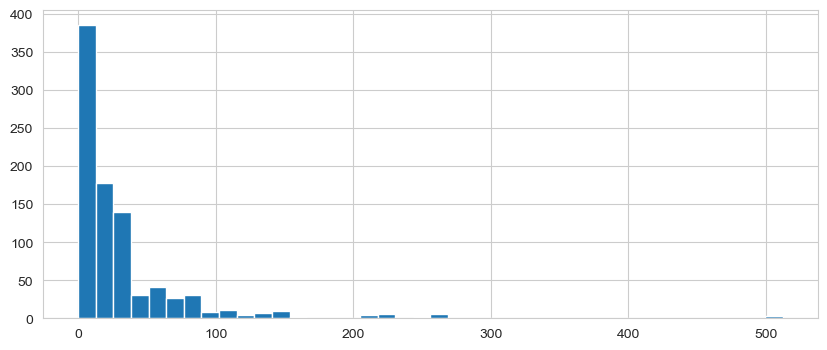

In [62]:
train['Fare'].hist(bins = 40, figsize= (10, 4))

In [63]:
import cufflinks as cf
cf.go_offline()

In [64]:
train['Fare'].iplot(kind = 'hist', bins = 50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

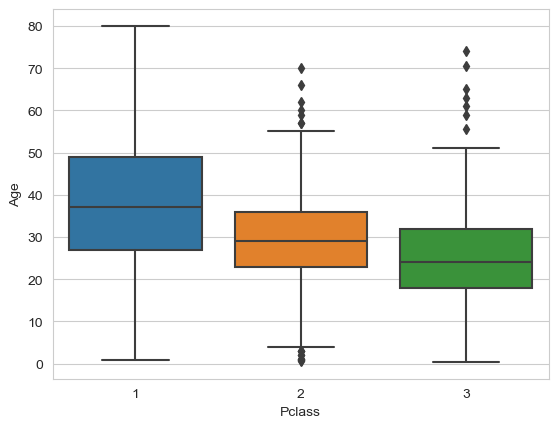

In [65]:
sns.boxplot(x = 'Pclass', y= 'Age', data = train)

In [66]:
def impute_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [67]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

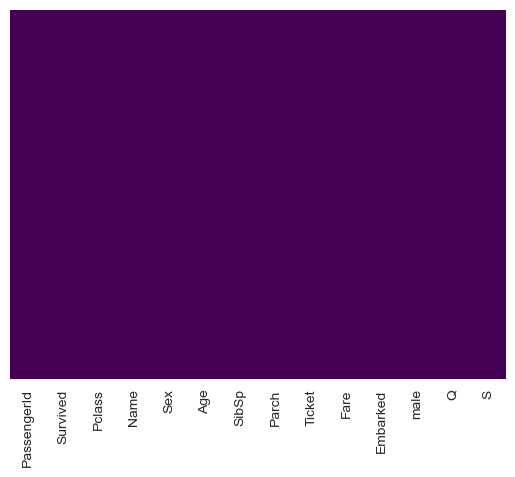

In [74]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [69]:
train.drop('Cabin', axis = 1, inplace = True)

In [70]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [71]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [72]:
train = pd.concat([train, sex, embark],axis = 1)

In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [78]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [80]:
train.drop('PassengerId', axis = 1, inplace = True)

In [81]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [82]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [88]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [89]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

In [90]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# linear regression

In [91]:
linreg = LinearRegression()

In [92]:
linreg.fit(x_train, y_train)

LinearRegression()

In [93]:
print(linreg.coef_)

[-0.12907185 -0.07069316 -0.04477495 -0.01317942  0.01940289 -0.23455787
 -0.01057654 -0.04183947]


In [94]:
print(linreg.intercept_)

0.37078651685393266


In [99]:
lin_pred = linreg.predict(x_test)

In [100]:
residual = y_test-lin_pred\

In [101]:
print(residual)

709    0.879923
439   -0.213374
840   -0.122388
720    0.175800
39     0.327609
         ...   
821    0.914777
633   -0.325663
456   -0.186863
500   -0.138757
430    0.615064
Name: Survived, Length: 268, dtype: float64


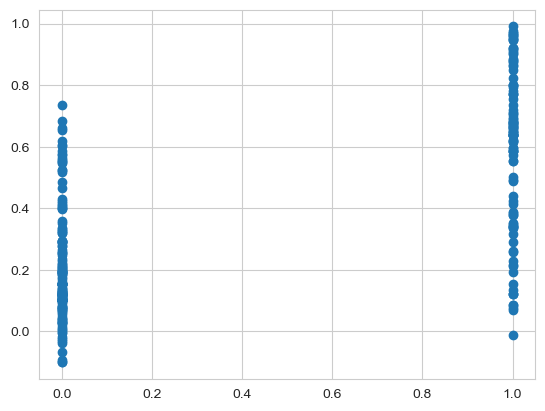

In [108]:
plt.scatter(y_test, lin_pred)

# logistic regression

In [109]:
log_rex = LogisticRegression()

In [111]:
log_rex.fit(x_train, y_train)

LogisticRegression()

In [112]:
log_pred = log_rex.predict(x_test)

In [114]:
from sklearn.metrics import classification_report

In [116]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.71      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
confusion_matrix(y_test, log_pred)

array([[140,  17],
       [ 32,  79]], dtype=int64)